You should have finished watching a video on support vector machines.  This algorithm offers very high accuracy compared to other classifiers. It is used in diverse applications such as face detection, intrusion detection, classification of emails,  and handwriting recognition.  This classifier works by separating data points using a hyperplane with the largest amount of margin.

Let's take a look at using SVM to analyze if we can use specific data measurements to improve the diagnosis of breast cancer.  We have a dataset that includes tumors, malignant (cancerous) or benign (non-cancerous), and features obtained from several cell images.
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.  The dataset is hosted [here](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29) but I have put it also in our Github repository.

Briefly:

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

Additionally, the mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  

In [1]:
import pandas as pd
dataset = pd.read_csv('../data/cancer.csv')
dataset.head()

,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,conc_mean,conc_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,conc_worst,conc_points_worst,symmetry_worst,fractral_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


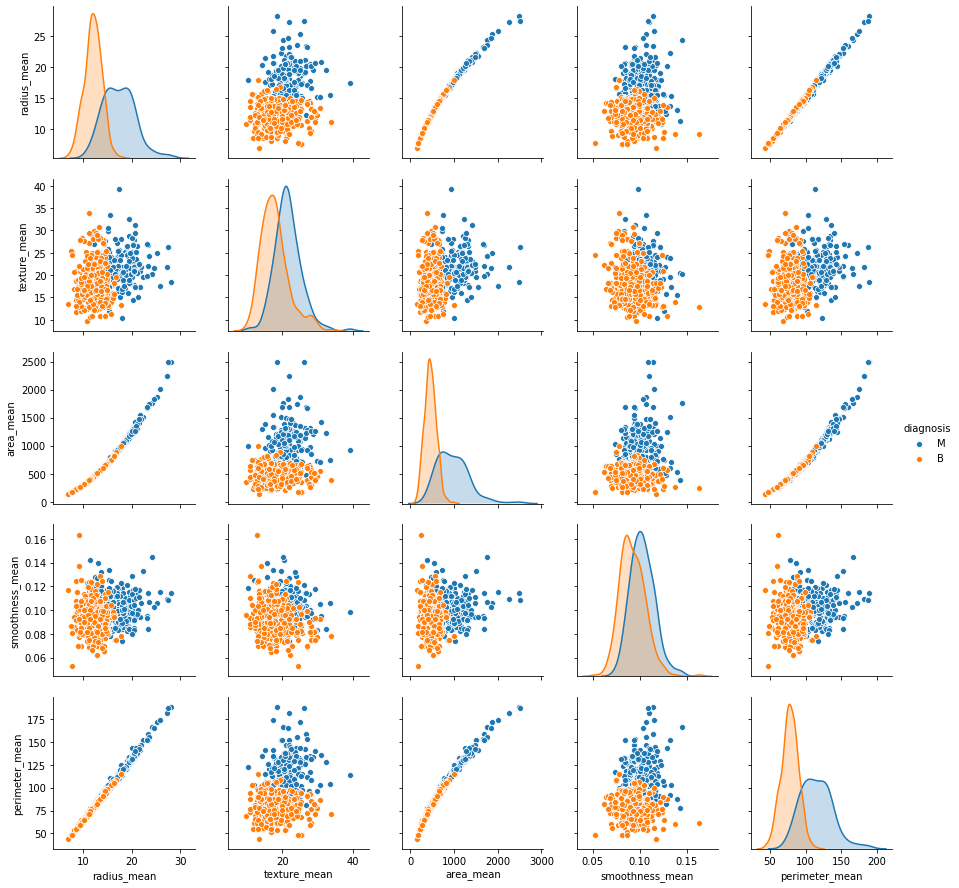

In [16]:
import seaborn as sns
sns.pairplot(dataset, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean','perimeter_mean'])

To prepare the dataset for SVM algorithms, I'd suggest doing three things:

1.  Check for NA values.  Previously, I've pretty much ignored this step but for your own datasets you may want to do so to decide how to deal with them.

2.  Decide what data goes into your X and y variables.  

3.  Ensure that the label categories are numeric.

4.  Create training and test datasets.


In [3]:
dataset.isnull().sum()
dataset.isna().sum()

ID                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
conc_mean            0
conc_points_mean     0
symmetry_mean        0
fractral_mean        0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
conc_se              0
conc_points_se       0
symmetry_se          0
fractral_se          0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
conc_worst           0
conc_points_worst    0
symmetry_worst       0
fractral_worst       0
dtype: int64

In [4]:
X = dataset.iloc[:, 2:32].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
Y = dataset.iloc[:,1].values
Y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [6]:
# You've learned one way of doing this previously in our Naive Bayes tutorial.
# Here is another nifty way of converting labels to numerical values.

#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [8]:
X_train.shape

(426, 30)

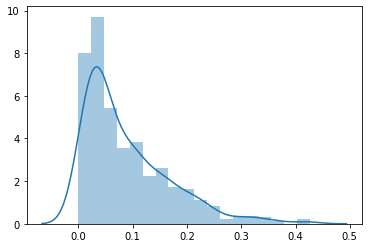

In [17]:
sns.distplot(X[:,6])

In [10]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-0.21395901,  0.3125461 , -0.14355187, ...,  1.37043754,
         1.08911166,  1.53928319],
       [-0.26750714,  1.461224  , -0.32955207, ..., -0.84266106,
        -0.71577388, -0.88105993],
       [-0.03922298, -0.86770223, -0.10463112, ..., -0.505318  ,
        -1.20298225, -0.92494342],
       ...,
       [-0.51270124, -1.69096186, -0.54095317, ..., -0.12632201,
         0.33773512, -0.42872244],
       [-0.17732081, -2.01395163, -0.17345939, ..., -0.62875108,
        -0.29500302, -0.65432858],
       [ 1.5305829 , -0.26300709,  1.57961296, ...,  1.6694843 ,
         1.18085869,  0.48889253]])

In [18]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [22]:
Y_pred = classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [21]:
cm

array([[88,  2],
       [ 2, 51]], dtype=int64)

In [24]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.972027972027972


In [26]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        90
           1       0.96      0.96      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Discuss the success of this model for predicting malignant and benign tumors.


By looking at the confusion matrix we can look at the success of the model in predicting the tumors. There were 88 true positives and 51 true negatives. Also the accuracy of the model was high (97%). 

Conceptual Review Questions:
1.  What is is a hyperplane in SVM and how is it used?
2.  What are two tuning parameters that can be used for SVM and how do they impact the model in terms of overfitting?
3.  What are the pros and cons of SVMs?

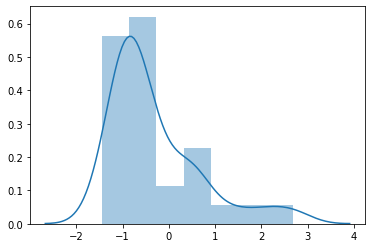

In [15]:
sns.distplot(X_train[1,:])

1. Hyperplanes are lines, planes or surfaces which divide the given data into different classes or labels. They are useful in SVM as they are used along with support vectors to seperate different dat labels.
2. The tuning parameters in which can be used in SVM are smoothning paramter 'C' and gamma. Gamma parameter tells us how complex a model can be and C parameter tells us how much error is allowable in training the model. High gamma will have complex model but it might overfit the data and will not work properly for other sets. Small gamma is a simpler model and will not fully capture the complex nature of the data. For very large C error are less. For smaller C some errors in prediction are allowable.
3. Pros:
    a. They are compact models, takes up less memory.
    b. Once trained the prediction is fast.
    c. works well with multidimensional data.
    d. Can be adapted to any kind of data.
    
   Cons:
    a. For large training sets, computational cost is high.
    b. Largely dependent on C, if not chosen properly it will affect the training results. 

Bias: It the difference between the actual values versus predicted values. High bias leads to simpler models which increases the error in predictions.

Variance: It is the variability in the model prediction for a given data point. High variance have complex models which fit the training data very well but they are not able to generalize for additional data. They have high errors for testing data fir high variance.

Overfitting: When the model is too complex and cannot generilze to additional data which get fed in leads to a condition called overfitting. Which means the model captures the nuture of the training data but cannot be used for other sets.

There is a tradeoff between bias and variance when training a model. We adjust parameter in a model so that it is complex but have low variance.